In [1]:
# Ce code "TP_CNN_TSP"est basé sur tensorflow et keras pour construire un modele CNN
# Ce code est basé sur le tutorial de CNN-tensorflow https://www.tensorflow.org/tutorials/images/cnn
#Pour lier google Colab avec google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pour importer les outils 
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, Model
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
from matplotlib import pyplot
import h5py
from tensorflow.keras.utils import img_to_array

tf.random.set_seed(2022)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Pour telécharger la database
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

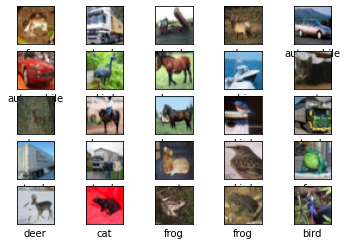

In [ ]:
#Pour afficher 25 images de l'ensemble d'apprentissage
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
# Taper les lignes nécessaires pour définir le modele CNN. C'est à vous d'essayer ;)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.utils import np_utils
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),padding="same",activation="relu",kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation="relu",padding="same",kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation="relu",padding="same",kernel_constraint=MaxNorm(3)))
model.add(Flatten())
model.add(Dense(64,activation="relu",kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))




In [ ]:
#Pour afficher l'architecture du modele CNN
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)         

In [ ]:
#Pour compilation et entrainement
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
model.save("/content/drive/My Drive/Colab Notebooks/my_model_10.h5")

Epoch 1/10
1563/1563 [==============================] - 119s 76ms/step - loss: 1.7180 - accuracy: 0.3641 - val_loss: 1.3316 - val_accuracy: 0.5318
Epoch 2/10
1563/1563 [==============================] - 120s 76ms/step - loss: 1.3792 - accuracy: 0.4990 - val_loss: 1.1440 - val_accuracy: 0.6000
Epoch 3/10
1563/1563 [==============================] - 116s 74ms/step - loss: 1.2321 - accuracy: 0.5596 - val_loss: 1.0198 - val_accuracy: 0.6472
Epoch 4/10
1563/1563 [==============================] - 118s 76ms/step - loss: 1.1351 - accuracy: 0.6006 - val_loss: 0.9394 - val_accuracy: 0.6711
Epoch 5/10
1563/1563 [==============================] - 115s 74ms/step - loss: 1.0552 - accuracy: 0.6308 - val_loss: 0.9096 - val_accuracy: 0.6923
Epoch 6/10
1563/1563 [==============================] - 117s 75ms/step - loss: 1.0039 - accuracy: 0.6475 - val_loss: 0.9126 - val_accuracy: 0.6806
Epoch 7/10
1563/1563 [==============================] - 114s 73ms/step - loss: 0.9684 - accuracy: 0.6635 - val_loss: 0

In [ ]:
model=load_model("/content/drive/My Drive/Colab Notebooks/my_model_10.h5")

313/313 - 5s - loss: 0.8377 - accuracy: 0.7125 - 5s/epoch - 17ms/step


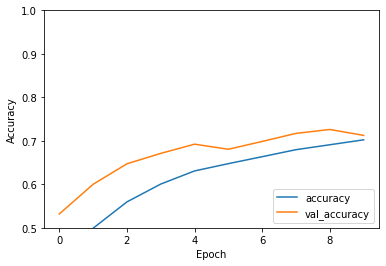

In [ ]:
# Pour tracer la courbe accuracy en foctions de nombre des epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7124999761581421


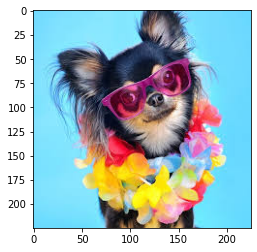

In [ ]:
#pour importer l'image chien.jpg
img = cv2.imread("/content/drive/My Drive/chien.jpg")
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

In [ ]:
#Pour la prédiction de l'image chien
img = cv2.resize(img_cvt, (32,32))
img = img.astype('float32')
img= img / 255.0
imgs = tf.expand_dims(
    img,
    axis=0,
    name=None
)
model.predict(imgs)

1/1 [==============================] - 0s 180ms/step


array([[1.7442751e-03, 7.9553183e-07, 4.0809486e-02, 2.9700291e-03,
        1.0372808e-05, 1.6881831e-02, 3.8486991e-02, 2.2537867e-04,
        8.9886761e-01, 3.2133275e-06]], dtype=float32)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 39ms/step


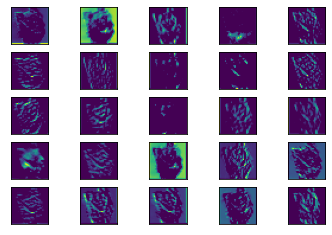

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 45ms/step


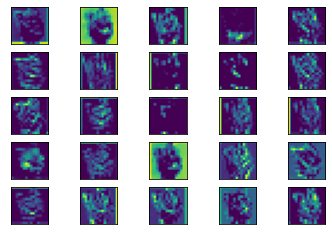

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 58ms/step


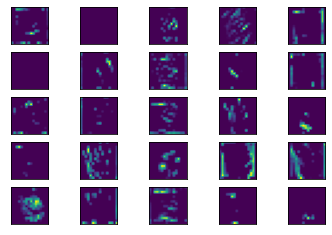

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
Total params: 19,392
Trainable params: 19,392
Non-trainable

1/1 [==============================] - 0s 58ms/step


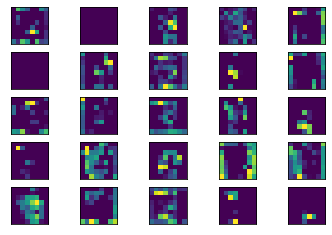

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3_input (InputLayer)  [(None, 32, 32, 3)]      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          3692

1/1 [==============================] - 0s 88ms/step


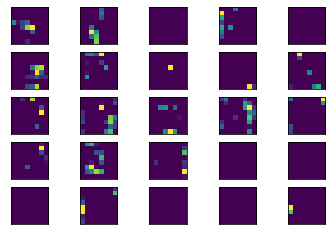

In [ ]:
#pour visualiser la couche i
i =0
for _ in range(5):
		model2 = Model(inputs=model.inputs, outputs=model.layers[i].output)
		model2.summary()
		feature_maps = model2.predict(imgs)
		square = 5
		ix = 1
		for _ in range(square):
				for _ in range(square):
						# specify subplot and turn of axis
						ax = pyplot.subplot(square, square, ix)
						ax.set_xticks([])
						ax.set_yticks([])
						# plot filter channel in grayscale
						pyplot.imshow(feature_maps[0, :, :, ix-1])
						ix += 1
		# show the figure
		pyplot.show()
		i +=1                                                                                                           